In [2]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# Load package 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import backward_induction as ex1

<h1> Exercise 2: The Infinite Horizon Consumption Model

Consider again the simplest consumption-saving model but with an infinite time horizon:

$$\begin{aligned}
    V_1^*(W_1) &= \max_{c_1,c_2,\dots} \{ \sqrt{c_1} +\beta \sqrt{c_2}+\beta^2\sqrt{c_3}+\cdots \} \\
    & \text{s.t.} \\
    W_{t+1} & = W_{t}-c_{t} \\
    c_{t} & \leq  W_{t} , \,\forall t\\
    c_{t} & \in  \mathbb{R}_+, \,\forall t
\end{aligned}$$
for $\beta =0.9$ and $W_1=5$.



Notice, we can rewrite the first equation as a Bellman equation:

$$\begin{aligned}
    V^*(W_t) &=\sqrt{c_t} +\beta V^*(\underbrace{W_{t}-c_t}_{W_{t+1}}), \forall t
\end{aligned}$$


### 1. Solve the model using value function iteration (VFI): 

In [15]:
# Setup
beta = 0.90
W = 5
grid_W = np.arange(W+1)
Cstar = np.zeros([W+1])

# Parameters for VFI
max_iter = 200   # maximum number of iterations
delta = 1000 #difference between V_next and V_now
tol = 10e-2 #convergence tol. level
it = 0  #iteration counter 
V_now = np.zeros([W+1]) #arbitrary starting values

while (max_iter>= it and tol<delta):
    it = it+1
    V_next = V_now.copy()
    for w in range(W+1):
        #Fill in
        c = np.arange(w+1)
        
        V_guess = np.sqrt(c) + beta * V_next[w-c]

        #if w == 1 : print(V_next[w-c])

        V_now[w] = np.amax(V_guess)
        Cstar[w] = np.argmax(V_guess)

    delta = np.amax(np.abs(V_now - V_next))

print(V_now)

[0.     1.     1.9    2.71   3.439  4.0951]


### 2. Create a function with $\beta$ and $W$ as inputs. Solve the model for $\beta=0.9$ and $W=20$.

In [21]:
# Define a function
def solve_VFI(beta,W):
    grid_W = np.arange(W+1)
    Cstar = np.zeros([W+1])
    
    # Parameters for VFI
    max_iter = 20   # maximum number of iterations
    delta = 1000 #difference between V_next and V_now
    tol = 10e-2 #convergence tol. level
    it = 0  #iteration counter 
    V_now = np.zeros([W+1]) #arbitrary starting values
    
    while (max_iter>= it and tol<delta):
        it = it+1
        V_next = V_now.copy()
        for w in range(W+1):
            #Fill in
        
            c = np.arange(w+1)
        
            V_guess = np.sqrt(c) + beta * V_next[w-c]

            #if w == 1 : print(V_next[w-c])

            V_now[w] = np.amax(V_guess)
            Cstar[w] = np.argmax(V_guess)
        
        
        delta = np.amax(np.abs(V_now - V_next))

    return Cstar, V_now, it

W = 20
beta = 0.9

Cstar, Vstar, _ = solve_VFI(beta,W)

Cstar

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 4.])

### 3. Plot the converged value function and make sure the value function is increasing in $W$.

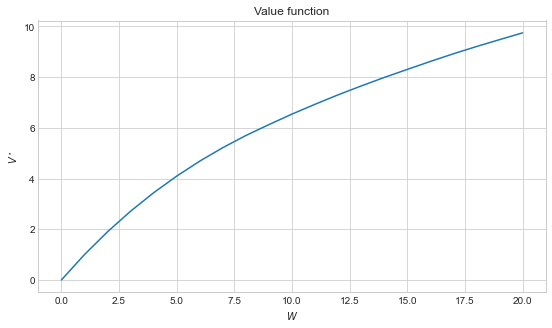

In [23]:
fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(np.arange(W+1),Vstar)
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V^\star$")
ax.set_title(f'Value function')

plt.show()

### 4. For $T=10$, $\beta=0.9$  and $W=20$ compare your solution using backward induction from exercise 1 with VFI. *How do the solutions differ?* 

In [ ]:
T = 10
beta = 0.9
W = 20

_,Vstar_bi = ex1.solve_backwards(beta=beta,W=W,T=T) 

fig = plt.figure(figsize=(10,5))# figsize is in inches...
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(W+1),Vstar, label = f'Value function iteration', linestyle = 'dashed', linewidth=4)
for t in [0]+list(range(1,T,2)):
    ax.plot(np.arange(W+1),Vstar_bi[:,t], label = f'Backward induction, $t = {t+1}$')
ax.legend()
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V^\star$")
plt.show()

### 5. Vary $\beta$ and check that the number of periods until convergence is increasing in $\beta$. *What is the reason for this lower convergence?*

In [ ]:
beta_vec = [0.3,0.5,0.75, 0.80, 0.85, 0.90,0.93, 0.96]
it_vec = np.nan + np.zeros(len(beta_vec))
W = 20

for i,beta in enumerate(beta_vec):
    
    _,_,it = #Fill in
    it_vec[i] = it


In [ ]:
fig = plt.figure(figsize=(10,5))# figsize is in inches...

ax = fig.add_subplot(1,1,1)
ax.plot(beta_vec,it_vec)
ax.set_xlabel(f"$\u03B2$")
ax.set_ylabel("Number of iterations")
plt.show()

### 6. Simulate $C_1$, $C_2$,...,$C_{10}$ using the policy function found in 2) and W=5

In [ ]:
# define function
def simulate(Cstar,T,W):
    C_vfi = np.empty(T)
    W_now = W
    for t in range(T):
        W_now = int(W_now)   # change the type to integreger 0,1,2,3 and so on
        #Fill in             # Use the solution 
         
        W_now = W_now-C_vfi[t]
    return C_vfi


# 4. Simulate
W = 5
T = 10
C_sim = simulate(Cstar,T,W)  # Call function
        
print('Solution for C with T =',T,'and W =', W , ': C =',C_sim)